In [1]:
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.cs_vqe_tools as cs_tools
import utils.plotting_tools as plot
from utils.molecule_tools import get_molecule
from matplotlib import pyplot as plt
import json

with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
     
species = list(model_data.keys())
species

/home/ucaptwe/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/ucaptwe/anaconda3/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',


['H2_3-21G_SINGLET',
 'H6_STO-3G_SINGLET',
 'H2_6-31G_SINGLET',
 'H2_6-311G_SINGLET',
 'H3+_STO-3G_SINGLET',
 'H3+_3-21G_SINGLET',
 'H3+_STO-3G_SINGLET_alt',
 'HeH+_3-21G_SINGLET',
 'HeH+_3-21G_SINGLET_alt',
 'HeH+_6-311G_SINGLET',
 'H2O_STO-3G_SINGLET',
 'H2O_STO-3G_SINGLET_alt',
 'BeH+_STO-3G_SINGLET',
 'LiH_STO-3G_SINGLET',
 'CH+_STO-3G_SINGLET',
 'HF_STO-3G_SINGLET',
 'B+_STO-3G_SINGLET',
 'N+_STO-3G_SINGLET',
 'OH+_STO-3G_SINGLET',
 'CH2_STO-3G_SINGLET',
 'BeH2_STO-3G_SINGLET',
 'Be_STO-3G_SINGLET',
 'C_STO-3G_SINGLET']

In [2]:
species=[#"H2_3-21G_SINGLET",
#"H3+_STO-3G_SINGLET",
#"H3+_3-21G_SINGLET",
#"HeH+_3-21G_SINGLET",
"HeH+_6-311G_SINGLET",
#"H2O_STO-3G_SINGLET",
#'BeH2_STO-3G_SINGLET',
#'CH2_STO-3G_SINGLET'
"BeH+_STO-3G_SINGLET",
"LiH_STO-3G_SINGLET",
"CH+_STO-3G_SINGLET",
"HF_STO-3G_SINGLET",
"B+_STO-3G_SINGLET",
'C_STO-3G_SINGLET',
'Be_STO-3G_SINGLET']

In [2]:
anz_data = {}
for speciesname in species:

    molecule    = model_data[speciesname]
    ham         = molecule['ham']
    uccsd       = molecule['uccsd']
    hf_config   = molecule['hf_config']
    num_qubits  = molecule['num_qubits']
    terms_noncon= molecule['terms_noncon']

    mol_circ = cs_circ.cs_vqe_circuit(hamiltonian =ham,
                                      terms_noncon=terms_noncon,
                                      num_qubits  =num_qubits, 
                                      hf_config   =hf_config)
    
    anz_data[speciesname] = {'num_qubits':num_qubits, 
                             'num_terms':{'full':len(uccsd)},
                             'circdepth':{'full':mol_circ.full_uccsd(uccsd).depth()},
                             'chemaccnum':mol_circ.chem_acc_num_q,
                             'errors':mol_circ.cs_vqe_errors}
    
    print(speciesname, mol_circ.chem_acc_num_q)
    for num_sim_q in range(1, mol_circ.chem_acc_num_q+1):
        qc = mol_circ.build_circuit(uccsd, num_sim_q)
        anz_data[speciesname]['num_terms'][num_sim_q] = len(mol_circ.project_anz_terms_alt(uccsd, num_sim_q))
        anz_data[speciesname]['circdepth'][num_sim_q] = qc.depth()


/home/ucaptwe/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


H2_3-21G_SINGLET 5
H6_STO-3G_SINGLET 9
H2_6-31G_SINGLET 5
H2_6-311G_SINGLET 9
H3+_STO-3G_SINGLET 3
H3+_3-21G_SINGLET 9
H3+_STO-3G_SINGLET_alt 3
HeH+_3-21G_SINGLET 6
HeH+_3-21G_SINGLET_alt 6
HeH+_6-311G_SINGLET 9
H2O_STO-3G_SINGLET 7
H2O_STO-3G_SINGLET_alt 7
BeH+_STO-3G_SINGLET 6
LiH_STO-3G_SINGLET 4
CH+_STO-3G_SINGLET 6
HF_STO-3G_SINGLET 4
B+_STO-3G_SINGLET 3
N+_STO-3G_SINGLET 0
OH+_STO-3G_SINGLET 5
CH2_STO-3G_SINGLET 8
BeH2_STO-3G_SINGLET 7
Be_STO-3G_SINGLET 3
C_STO-3G_SINGLET 4


In [42]:
new_anz_data = {mol:anz_data[mol] for mol in anz_data if (anz_data[mol]['num_qubits']!=anz_data[mol]['chemaccnum'] and not anz_data[mol]['chemaccnum']==0) and mol.find('alt')==-1}

In [43]:
[mol for mol in anz_data if mol not in new_anz_data]

['H2_3-21G_SINGLET',
 'H6_STO-3G_SINGLET',
 'H2_6-31G_SINGLET',
 'H2_6-311G_SINGLET',
 'H3+_STO-3G_SINGLET',
 'H3+_3-21G_SINGLET',
 'H3+_STO-3G_SINGLET_alt',
 'HeH+_3-21G_SINGLET',
 'HeH+_3-21G_SINGLET_alt',
 'H2O_STO-3G_SINGLET_alt',
 'N+_STO-3G_SINGLET']

In [45]:
len(new_anz_data.keys())

12

['CH2_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET', 'HeH+_6-311G_SINGLET', 'BeH2_STO-3G_SINGLET', 'OH+_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'CH+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'BeH+_STO-3G_SINGLET', 'C_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'B+_STO-3G_SINGLET']


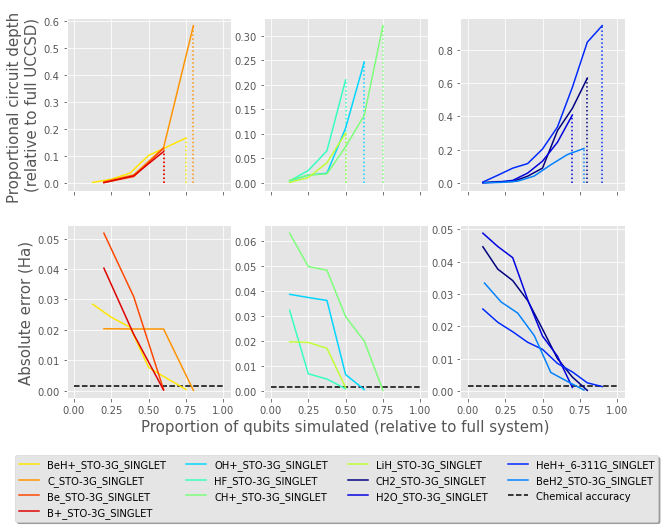

In [63]:
anz_data_sorted = sorted(new_anz_data, key=lambda x:new_anz_data[x]['num_qubits'])
anz_data_sorted.reverse()
print(anz_data_sorted)

fig, axes = plt.subplots(nrows=2, 
                         ncols=3, 
                         figsize = (10, 7), 
                         sharex=True,
                         gridspec_kw={'height_ratios': [1, 1]})
max_qubits = {}

for i, speciesname in enumerate(anz_data_sorted):
    c = plt.cm.jet(i/len(new_anz_data))
    if i <=int(len(new_anz_data)/3)-1:
        index = 2
    elif i <=2*int(len(new_anz_data)/3)-1:
        index = 1
    else:
        index = 0
           
    data = new_anz_data[speciesname]
    ca = data['chemaccnum']
    
    if index in max_qubits:
        if max_qubits[index] < data['chemaccnum']:
            max_qubits[index] = data['chemaccnum']
    else:
        max_qubits[index] = data['chemaccnum']
    
    qubits = list(range(1, ca+1))
    X = [q/data['num_qubits'] for q in qubits]
    Y_depth = [data['circdepth'][i]/data['circdepth']['full'] for i in qubits]
    Y_error = data['errors'][1:ca+1]
    ca_ratio = data['circdepth'][ca]/data['circdepth']['full']
    
    axes[(0, index)].plot(X, Y_depth, color=c, label=speciesname)
    axes[(0, index)].vlines(X[-1], 0, ca_ratio, color=c, ls=':')
    axes[(1, index)].plot(X, Y_error, color=c)
    
    #axes[(0, index)].plot(X_full, Y_anznm_full, color=c, ls='-.')
    #axes[(1, index)].plot(X_full, Y_depth_full, color=c, ls='-.')
    #axes[(0, 1)].set_xticklabels(list(range(1, 14))+['full'])

for i in range(3):
    X = list(range(1,max_qubits[i]+1))
    
    axes[(1,i)].hlines(0.0016, 0, 1, ls='--', color='black')
    #axes[(0,i)].set_xticks(X)
    #axes[(1,i)].set_xticks(X)
    
axes[(1,1)].hlines(0.0016, 1, 1, label='Chemical accuracy', ls='--', color='black')
axes[(0,0)].set_ylabel('Proportional circuit depth \n(relative to full UCCSD)',fontsize=15)
axes[(1,0)].set_ylabel('Absolute error (Ha)',fontsize=15)
axes[(1,1)].set_xlabel('Proportion of qubits simulated (relative to full system)',fontsize=15)

fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=4)

In [64]:
fig.savefig('plots/CS-VQE_paper/reduced_ansatz_depth.png', dpi=300, bbox_inches='tight')

In [66]:
import json 

data={}
for k in anz_data.keys():
    data[str(k)] = anz_data[k]

with open("data/anz_circ_depth.json", "w") as outfile: 
    json.dump(data, outfile)

In [69]:
for mol in anz_data.keys():
    data = anz_data[mol]
    print(mol, data['num_qubits'], data['chemaccnum'])

H2_3-21G_SINGLET 5 5
H6_STO-3G_SINGLET 9 9
H2_6-31G_SINGLET 5 5
H2_6-311G_SINGLET 9 9
H3+_STO-3G_SINGLET 3 3
H3+_3-21G_SINGLET 9 9
H3+_STO-3G_SINGLET_alt 3 3
HeH+_3-21G_SINGLET 6 6
HeH+_3-21G_SINGLET_alt 6 6
HeH+_6-311G_SINGLET 10 9
H2O_STO-3G_SINGLET 10 7
H2O_STO-3G_SINGLET_alt 10 7
BeH+_STO-3G_SINGLET 8 6
LiH_STO-3G_SINGLET 8 4
CH+_STO-3G_SINGLET 8 6
HF_STO-3G_SINGLET 8 4
B+_STO-3G_SINGLET 5 3
N+_STO-3G_SINGLET 5 0
OH+_STO-3G_SINGLET 8 5
CH2_STO-3G_SINGLET 10 8
BeH2_STO-3G_SINGLET 9 7
Be_STO-3G_SINGLET 5 3
C_STO-3G_SINGLET 5 4
